# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/work/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv")

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

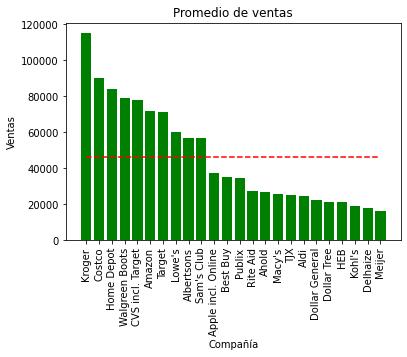

In [ ]:
df_sales = df.sort_values("Sales", ascending=0)

x = df_sales["Company"][1::]
y = df_sales["Sales"][1::]

plt.bar(x, y, color = "g")
plt.title("Promedio de ventas")
plt.xlabel("Compañía")
plt.ylabel("Ventas")
plt.xticks(rotation = "vertical")

media = df_sales["Sales"][1::].mean()
mediaSales = []
for i in range(len(df_sales)):
    mediaSales.append(media)

plt.plot(df_sales['Company'][1::], mediaSales[1::], linestyle = "--", color = "r");

Del anterior gráfico podemos concluir que:

-De las veinticuatro compañía analizadas, las diez primeras tuvieron ventas por encima del promedio, mientras que las catorce restantes estuvieron por debajo de la media. 

-Además, se podría decir que la empresa que ocupa el primer puesto, Kroger, obtuvo un total de ventas de más del doble del promedio, mientras que la última empresa, Meijer, obtuvo menos de la mitad del promedio.  

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

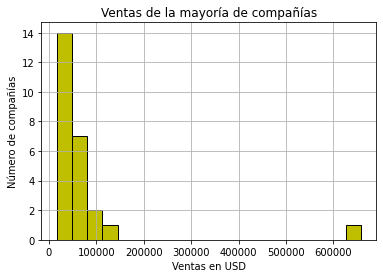

In [ ]:
Ventas = df["Sales"].plot.hist(bins=20, color= "y", edgecolor = "black")
plt.title("Ventas de la mayoría de compañías")
plt.grid(True)
plt.xlabel("Ventas en USD")
plt.ylabel("Número de compañías");

El anterior histograma nos permite inferir lo siguiente:

-La mayoría de las compañías están contenidas en el rango entre 0 y 150.000 millones dólares.

-De las 25 compañías solo una está fuera del anterior rango, con ventas superiores a los 600.000 millones dólares.

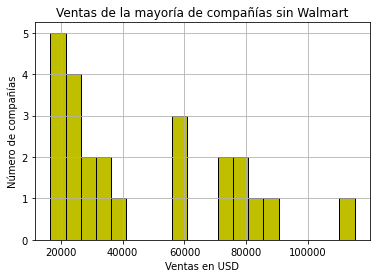

In [ ]:
la = df["Sales"][1::].plot.hist(bins=20, color= "y", edgecolor = "black")
plt.title("Ventas de la mayoría de compañías sin Walmart")
plt.grid(True)
plt.xlabel("Ventas en USD")
plt.ylabel("Número de compañías");

En este nuevo histograma hemos excluido a la compañía dominante pues representa un dato atípico, y ahora podemos concluir que:

-De las 24 compañías, 14 están entre los 10.000 y 40.000 millones dólares en ventas.

-Tres compañías tuvieron ventas aproximadas de 60.000 millones dólares.

-Cuatro compañías están entre los 70.000 y 80.000 millones dólares, mientras que hay dos compañías entre los 80.000 y 90.000 millones dólares.

-Una sola compañía supera los 100.000 millones dólares en ventas.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

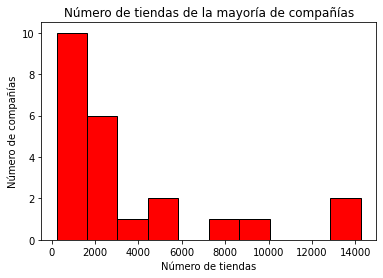

In [ ]:
Tiendas = df["Stores"].plot.hist(bins=10, color= "r", edgecolor = "black")
plt.title("Número de tiendas de la mayoría de compañías")
plt.xlabel("Número de tiendas")
plt.ylabel("Número de compañías");

Gracias a este histograma podemos deducir que: 

-De 25 compañías, 16 de ellas, es decir la mayoria, se ubican por debajo de las 3.000 tiendas. 

-Hay otras tres compañías que van desde las 3.000 hasta casi las 6.000 tiendas.

-Entre las 7.000 y las 10.000 tiendas tenemos otras tres compañías. 

-Finalmente, solo dos compañías tienen entre 13.000 y un poco más de 14.000 tiendas.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

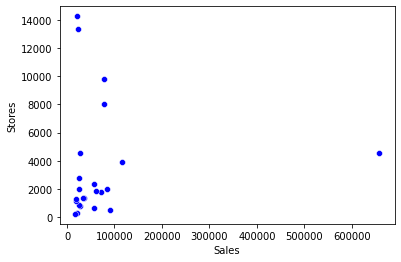

In [ ]:
sns.scatterplot(data= df, x = "Sales", y = "Stores", color = "b");

Este diagrama de dispersión nos arroja las siguientes conclusiones: 

-No existe correlación alguna entre la cantidad de tiedas y la cantidad de ventas de las compañías.

-La empresa que más tiendas tiene (Más de 14.000) se ubica entre las que menos ventas ha obtenido.

La empresa líder en ventas, que supera ampliamente a las demás (Más de 600.000 millones dólares) no tiene un amplio número de tiendas (Más de 4.000), aunque sí supera a la mayoría de compañías que se ubican por debajo de las 3.000 tiendas. 

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
rango = df["Sales"].max() - df["Sales"].min()
rango

641527

Este es el rango de ventas si tenemos en cuenta a Walmart, la empresa dominante del sector: 641.527 millones dólares.

In [ ]:
rango2 = df["Sales"][1::].max() - df["Sales"].min()
rango2

98445

Si excluimos a Walmart y analizamos las 24 compañías restantes el rango de ventas que obtenemos es de 98.445 millones dólares

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

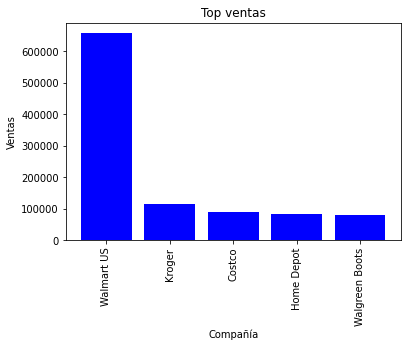

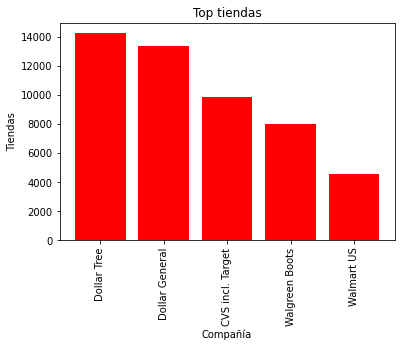

In [ ]:
df_stores = df.sort_values("Stores", ascending=0)

#grafica_uno 
x = df_sales["Company"][0:5]
y = df_sales["Sales"][0:5]

plt.bar(x, y, color = "b")
plt.title("Top ventas")
plt.xlabel("Compañía")
plt.ylabel("Ventas")
plt.xticks(rotation = "vertical")
plt.show()

#grafica_dos
x = df_stores["Company"][0:5]
y = df_stores["Stores"][0:5]

plt.bar(x, y, color = "r")
plt.title("Top tiendas")
plt.xlabel("Compañía")
plt.ylabel("Tiendas")
plt.xticks(rotation = "vertical")
plt.show();

De las anteriores dos gráficas se puede deducir que:

-De las cinco compañías con mayor número de tiendas, solo dos de ellas aparecen en el top de numero de ventas. Estas son Walgreen Boots y Walmart US. 

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

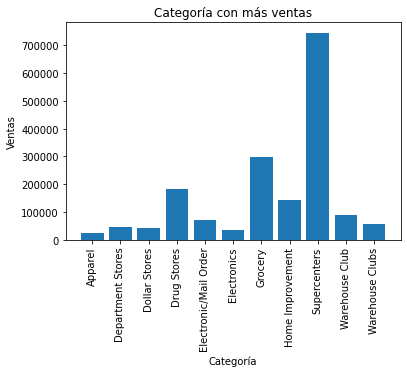

In [ ]:
df_category = df.groupby("Category")["Sales"].sum()
plt.bar(df_category.index, df_category)
plt.xticks(rotation = "vertical")
plt.title("Categoría con más ventas")
plt.xlabel("Categoría")
plt.ylabel("Ventas");

En este punto podemos observar que:

-La categoría que más ventas generó fue la de "Supercenters", seguida de "Grocery" y en tercer lugar "Drug store".

-La categoría dominante generó más de 700.000 millones de dólares. Esto es más del doble de que la segunda categoría en el ranking, que generó un poco más de 300.000 millones de dólares en ventas.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

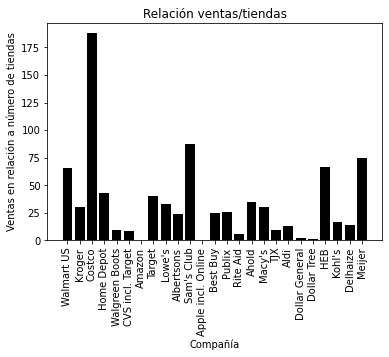

In [ ]:
x = df["Company"] 
y = df["Sales/Avg. Store"] 
plt.bar(x, y, color = "black")
plt.title("Relación ventas/tiendas")
plt.xlabel("Compañía")
plt.ylabel("Ventas en relación a número de tiendas")
plt.xticks(rotation="vertical");

Con este gráfico de barras podemos concluir que:

-La empresa que tiene una mayor correlación entre el número de tiendas y el total de ventas es Costco.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de3666bf-2d1f-4fc9-9379-bf7db358409b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>